In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Source Han Serif CN"

# 回归分析

回归是什么？从输入、输出的角度来看，回归输入「两组或多组数据」，而输出「数据之间的预测表达式」；它是探寻数据之间相互关系的一种研究方法。

输入的数据一般分为自变量和因变量两部分，如果自变量只有一组，那么就是一元回归，否则是多元回归，有几组自变量就有几元，它们的回归表达式也将是一个多元函数。

根据自变量和因变量之间的关系，回归可能是线性或非线性的，线性表示可以用一个一次函数来表示数据之间的关系。

- 线性：自变量的增量对应的因变量的增量是恒定的
- 非线性：自变量的增量对应的因变量的增量是不恒定的

下面将从一元线性回归分析开始。

## 一元线性回归

一元线性回归考察一个随机变量 $Y$ 和普通变量 $x$ 之间的关系，它们通常成对地记录：

$$
(x_1, y_1), (x_2, y_2), \cdots, (x_n, y_n)
$$

但在编程中，为了程序使用的方便，通常将其作为两列数据存储，例如：某种合金的抗拉强度 $\sigma$(MPa) 与含碳量 $x$(%) 的关系实验数据如下

In [2]:
carbon = np.array([0.04, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.12, 0.15, 0.16, 0.17, 0.19, 0.20, 0.23])
sigma = np.array([
    371.00,
    384.00,
    405.00,
    410.00,
    421.00,
    421.00,
    439.00,
    447.00,
    450.00,
    473.00,
    482.00,
    491.00,
    505.00,
    544.00,
    569.00,
])

在分析前，预先观察其散点图对我们接下来的分析是有利的，因为它可以让我们直观地感受到数据之间的关系，方便我们之后选择拟合模型。
用 Matplotlib 绘制散点图如下：

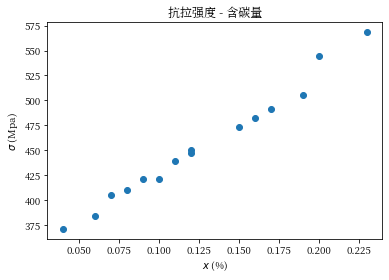

In [3]:
fig0 = plt.figure()
ax0 = fig0.add_subplot(111)
ax0.scatter(carbon, sigma)
ax0.set_title("抗拉强度 - 含碳量")
ax0.set_xlabel("$x$ (%)")
ax0.set_ylabel("$\\sigma$ (Mpa)")
fig0;

从图形上，我们可以观察到 $\sigma$ 与 $x$ 之间大致成线性关系，我们可以用一个一次函数来拟合它们：

$$
\hat{y} = k x + b \tag{1'}
$$

其中 $k, b$ 是待定系数，在程序中，对多项式表达式，通常只存储它们的系数。即，一个多项式 $a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n$ 将存储为列表

```python
[a0, a1, a2, a3, ..., an]
```

因此，上式 $(1')$ 通常写为：

$$
\hat{y} = p_0 + p_1 x \tag{1}
$$

回归时，我们需要做一条拟合直线，要求：**数据点到直线的距离之和最短**。我们如此定义一个数据点到拟合直线的距离（$P: (x_i, y_i) \rightarrow l: \hat{y} = p_0 + p_1 x$）：

$$
\begin{aligned}
   & [y_i - \hat{y}(x_i)]^2 \\
  =& [y_i - (p_0 + p_1 x_i)]^2
\end{aligned} \tag{2.1}
$$

而距离之和则为：

$$
Q(p_0, p_1) = \sum_{i=1}^{N} [y_i - (p_0 + p_1 x_i)]^2 \tag{2.2}
$$

回归问题的实质转变成求 $\hat{p_0}, \hat{p_1}$，使得 2.2 式中 $Q(\hat{p_0}, \hat{p_1})$ 最小，由于距离公式是一个平方式（日语称平方为二乘），因此对应的计算方法被称为最小二乘法。

## 最小二乘法

为了求解 $Q(p_0, p_1)$ 的最小值，求解其一阶偏导的根：

$$
\newcommand{\pp}[2]{\frac{\partial{}#1}{\partial{}#2}}
\begin{aligned}
    \pp{Q}{p_0} &= -2 \sum_{i=1}^{N} [y_i - (p_0 + p_1 x_i)]     &= 0 \\
    \pp{Q}{p_1} &= -2 \sum_{i=1}^{N} [y_i - (p_0 + p_1 x_i)] x_i &= 0
\end{aligned} \tag{3.1}
$$

将 3.1 式重新编写为以 $p_i$ 为主的易读形式：

$$
\begin{cases}
N &p_0 + (\sum_{i=1}^{N} x_i)&p_1 = \sum_{i=1}^{N} y_i \\
(\sum_{i=1}^{N} x_i) &p_0 + (\sum_{i=1}^{N} x_i^2) &p_1 = \sum_{i=1}^{N} x_i y_i
\end{cases} \tag{3.2}
$$

这样，我们就可以方便地将其转化为矩阵形式：

$$
$$

综上，$p_0, p_1$ 的统计值分别为

$$
\begin{cases}
\hat{p_0} &= \overline{y} - \hat{p_1} \overline{x} \\
\hat{p_1} &= \frac{\sum_{i=1}^{N} (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{N} (x_i - \overline{x})^2}
\end{cases} \tag{3.6}
$$

因此，一段线性回归可由以下函数计算：

In [4]:
def my_leastsq(x, y):
    """最小二乘法
    
    :param x: 一列数据
    :param y: 与 x 维度相同的一列数据
    :returns: 拟合曲线的截距，斜率
    """
    length = len(x)
    x_avg = np.sum(x) / length
    y_avg = np.sum(y) / length
    
    xx = x - x_avg
    yy = y - y_avg
    
    p1 = np.sum(xx * yy) / np.sum(xx * xx)
    p0 = y_avg - p1 * x_avg
    
    return p0, p1

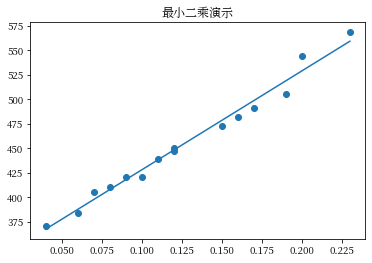

In [5]:
_b, _k = my_leastsq(carbon, sigma)

_fig = plt.figure()
_ax = _fig.add_subplot(111)
_ax.scatter(carbon, sigma)
_ax.plot(carbon, _k * carbon + _b)
_ax.set_title("最小二乘演示")
_fig;
# todo 置信度，相关系数

## 一元非线性回归

通常，会通过一定变换将非线性关系转化为线性关系求解：

$$
\begin{aligned}
\frac{1}{}:  &y = \frac{1}{x} \to y = x', x' = 1/x \\
\ln{}:       &y = e^x \to \ln{y} = x \\
\vdots
\end{aligned}
$$